# **Exploratory Data Analysis Notebook**

### In this notebook we will look to discover and view trends in our data and plot to visualize.  We will also continue to organize and prepare the data for the notebooks ahead.

#### Let's begin this notebook by reading in our revised dataframe from the main file used previously.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv(f'/Users/ryanm/Desktop/df.csv')
print(df.shape)
df.head(25)

(3214874, 14)


,user_id,order_number,product_name,order_id,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,aisle,department
0,1,1,XL Pick-A-Size Paper Towel Rolls,2539329,2,8,11.0,26405,5,0,54,17,paper goods,household
1,1,2,Aged White Cheddar Popcorn,2398795,3,7,15.0,26088,6,1,23,19,popcorn jerky,snacks
2,1,3,Creamy Almond Butter,473747,3,12,21.0,30450,5,1,88,13,spreads,pantry
3,1,4,XL Pick-A-Size Paper Towel Rolls,2254736,4,7,29.0,26405,5,1,54,17,paper goods,household
4,1,5,Bartlett Pears,431534,4,15,28.0,41787,8,1,24,4,fresh fruits,produce
5,1,6,Organic String Cheese,3367565,2,7,19.0,25133,4,1,21,16,packaged cheese,dairy eggs
6,1,7,Organic String Cheese,550135,1,9,20.0,25133,5,1,21,16,packaged cheese,dairy eggs
7,1,8,Organic Half & Half,3108588,1,14,14.0,49235,6,1,53,16,cream,dairy eggs
8,1,9,Organic Half & Half,2295261,1,16,0.0,49235,6,1,53,16,cream,dairy eggs
9,1,10,Zero Calorie Cola,2550362,4,8,30.0,46149,9,1,77,7,soft drinks,beverages


#### Before starting the plots, let's convert some of our cat (categorical type) columns to coded columns using cat codes.  This will help a lot when we go to plot so we can use those columns and gather more available insights.

In [3]:
df['product_name'] = df['product_name'].astype('category')
df['product_name_code'] = df['product_name'].cat.codes

df['aisle'] = df['aisle'].astype('category')
df['aisle_code'] = df['aisle'].cat.codes

df['department'] = df['department'].astype('category')
df['department_code'] = df['department'].cat.codes

df.head(10)


,user_id,order_number,product_name,order_id,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,aisle,department,product_name_code,aisle_code,department_code
0,1,1,XL Pick-A-Size Paper Towel Rolls,2539329,2,8,11.0,26405,5,0,54,17,paper goods,household,31683,99,11
1,1,2,Aged White Cheddar Popcorn,2398795,3,7,15.0,26088,6,1,23,19,popcorn jerky,snacks,980,103,20
2,1,3,Creamy Almond Butter,473747,3,12,21.0,30450,5,1,88,13,spreads,pantry,7124,124,16
3,1,4,XL Pick-A-Size Paper Towel Rolls,2254736,4,7,29.0,26405,5,1,54,17,paper goods,household,31683,99,11
4,1,5,Bartlett Pears,431534,4,15,28.0,41787,8,1,24,4,fresh fruits,produce,2419,50,19
5,1,6,Organic String Cheese,3367565,2,7,19.0,25133,4,1,21,16,packaged cheese,dairy eggs,20620,93,7
6,1,7,Organic String Cheese,550135,1,9,20.0,25133,5,1,21,16,packaged cheese,dairy eggs,20620,93,7
7,1,8,Organic Half & Half,3108588,1,14,14.0,49235,6,1,53,16,cream,dairy eggs,19411,33,7
8,1,9,Organic Half & Half,2295261,1,16,0.0,49235,6,1,53,16,cream,dairy eggs,19411,33,7
9,1,10,Zero Calorie Cola,2550362,4,8,30.0,46149,9,1,77,7,soft drinks,beverages,31862,117,3


#### Let's begin to look at some surface trends between some of our main features and plot them to see what that looks like so we can discover more about this dataset.

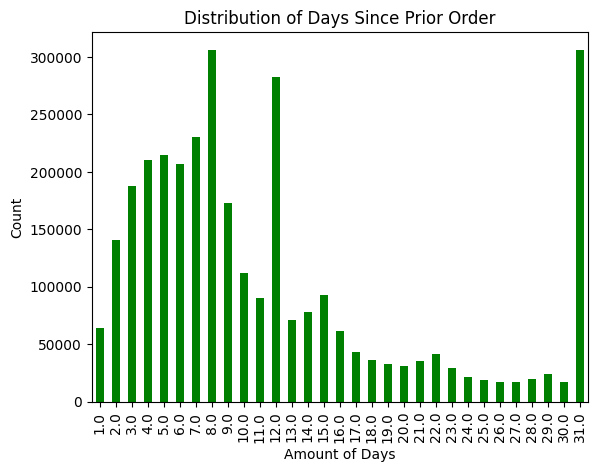

In [4]:
if df['days_since_prior_order'].min() == 0:
    df['days_since_prior_order'] += 1

df['days_since_prior_order'].value_counts().reindex(sorted(df['days_since_prior_order'].unique())).plot(kind='bar', color='green')
plt.xlabel('Amount of Days')
plt.ylabel('Count')
plt.title('Distribution of Days Since Prior Order')
plt.show()

#### So here we can see 3 clear values that stick out (8, 12, and 31), as well as a trend showing that most customers purchased again within the first week.

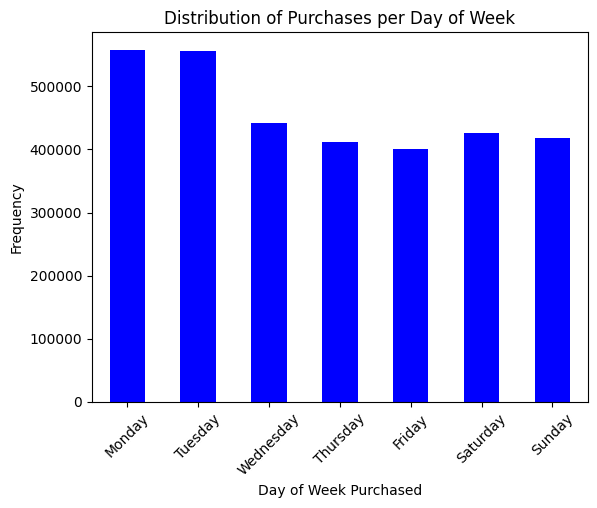

In [5]:
if df['order_dow'].min() == 0:
    df['order_dow'] += 1

day_mapping = {
    1 : 'Monday',
    2 : 'Tuesday',
    3 : 'Wednesday',
    4 : 'Thursday',
    5 : 'Friday',
    6 : 'Saturday',
    7 : 'Sunday'
}

df['order_dow'].map(day_mapping).value_counts().reindex(day_mapping.values()).plot(kind = 'bar', color = 'blue')
plt.xlabel('Day of Week Purchased')
plt.ylabel('Frequency')
plt.title('Distribution of Purchases per Day of Week')
plt.xticks(rotation = 45)
plt.show()



#### Interesting to see the most orders are placed on Monday and Tuesday of the week.

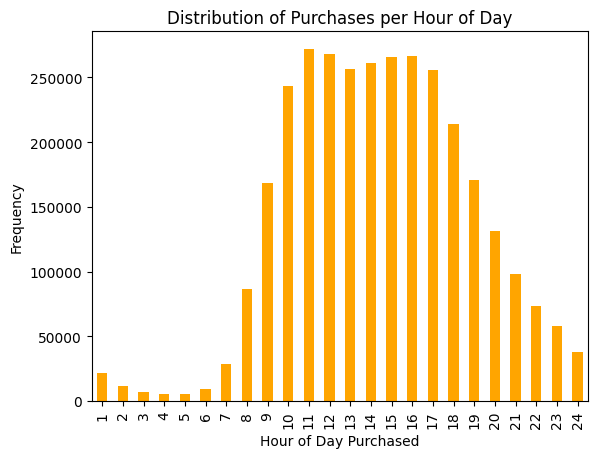

In [6]:
if df['order_hour_of_day'].min() == 0:
    df['order_hour_of_day'] += 1

df['order_hour_of_day'].value_counts().reindex(sorted(df['order_hour_of_day'].unique())).plot(kind = 'bar', color = 'orange')
plt.xlabel('Hour of Day Purchased')
plt.ylabel('Frequency')
plt.title('Distribution of Purchases per Hour of Day')
plt.show()

#### There's a noticeable pattern in purchase activity between 11am and 4pm.

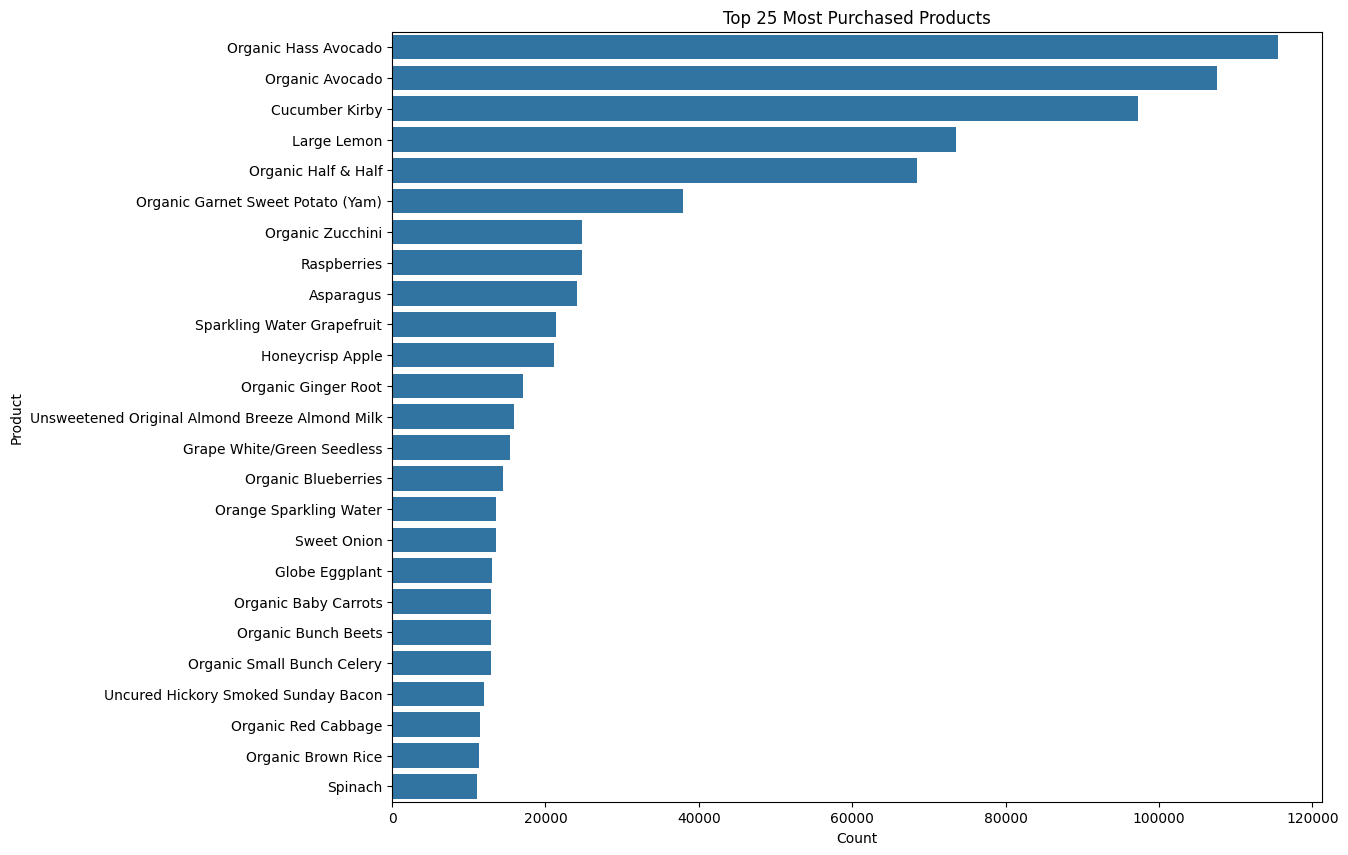

In [7]:
top_25_products = df['product_name'].value_counts().head(25)
top_25_p = df[df['product_name'].isin(top_25_products.index)]

plt.figure(figsize = (12,10))
sns.countplot(y = 'product_name', data = top_25_p, order = top_25_products.index)
plt.ylabel('Product')
plt.xlabel('Count')
plt.title('Top 25 Most Purchased Products')
plt.show()

#### The top 5 products take up the majority here, with both varieties of the avocado taking the top 2 spots.

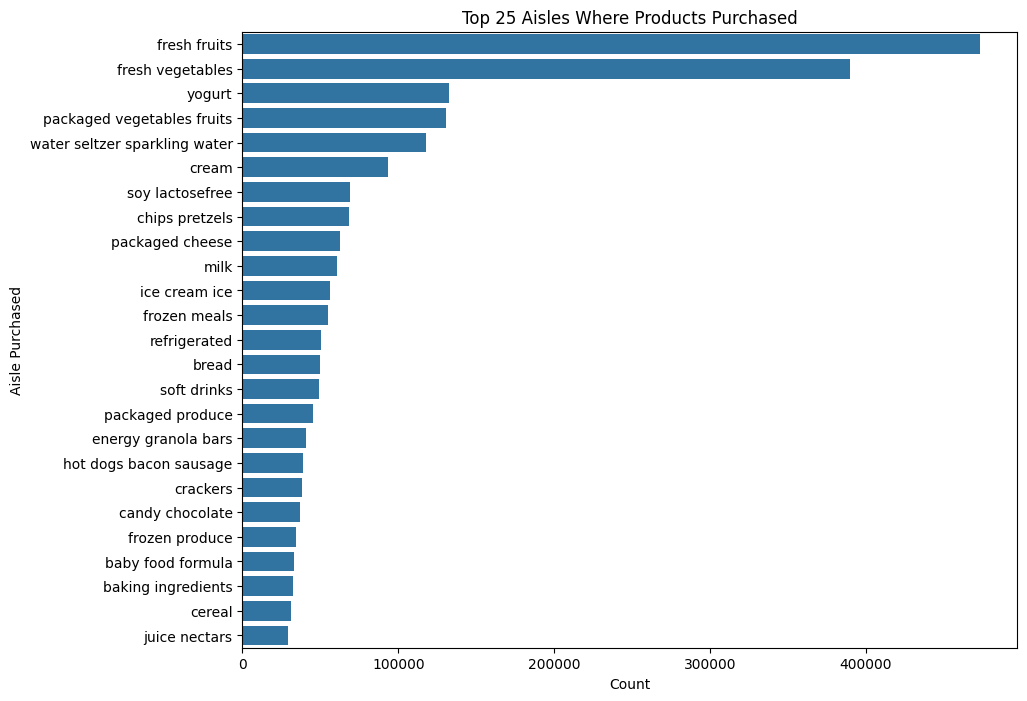

In [8]:
top_25_aisles = df['aisle'].value_counts().head(25)
top_25_a = df[df['aisle'].isin(top_25_aisles.index)]

plt.figure(figsize = (10,8))
sns.countplot(y = 'aisle', data = top_25_a, order = top_25_aisles.index)
plt.title('Top 25 Aisles Where Products Purchased')
plt.ylabel('Aisle Purchased')
plt.xlabel('Count')
plt.show()


#### Fresh fruits and fresh vegetables have a clear majority here.

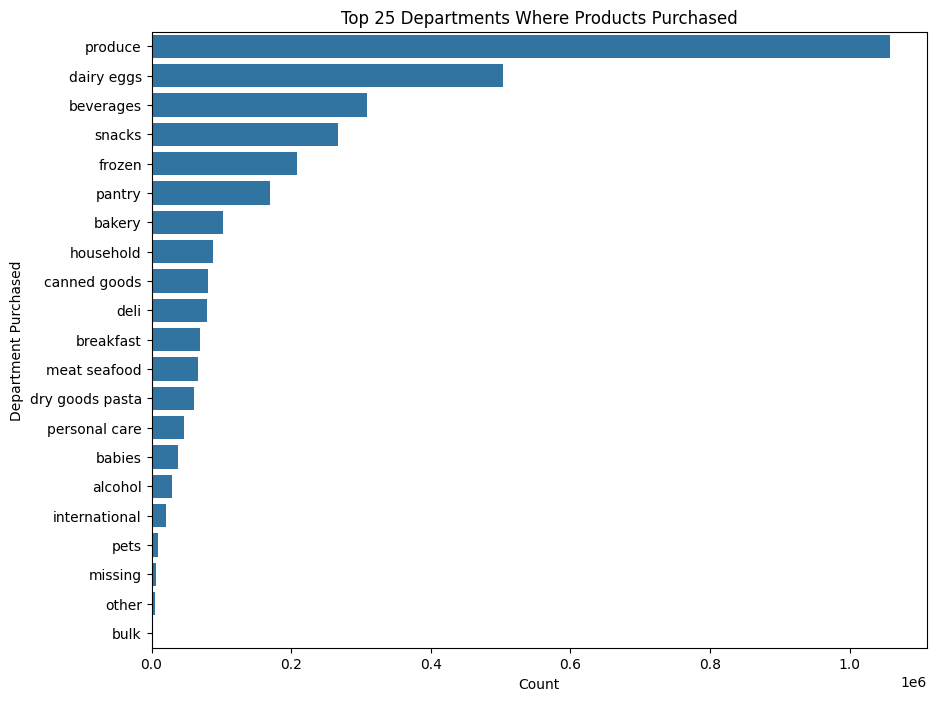

In [9]:
top_25_departments = df['department'].value_counts().head(25)
top_25_d = df[df['department'].isin(top_25_departments.index)]

plt.figure(figsize = (10,8))
sns.countplot(y = 'department', data = top_25_d, order = top_25_departments.index)
plt.ylabel('Department Purchased')
plt.xlabel('Count')
plt.title('Top 25 Departments Where Products Purchased')
plt.show()


#### Looks like produce has a clear margin, while dairy eggs is second.

#### With the general trends established let's create some new features and plot them so we can learn even more about our dataset and begin to prepare to model.

In [10]:
df['user_product_order_count'] = df.groupby(['user_id', 'product_id'])['order_id'].transform('count')
df['user_product_last_order'] = df.groupby(['user_id', 'product_id'])['order_number'].transform('max')
df['user_product_reorder_count'] = df.groupby(['user_id', 'product_id'])['reordered'].transform('sum')

df['avg_days_between_orders'] = df.groupby('user_id')['days_since_prior_order'].transform('mean').round(2)
df['std_days_between_orders'] = df.groupby('user_id')['days_since_prior_order'].transform('std').round(2)
df['total_orders'] = df.groupby('user_id')['order_number'].transform('max')

df['total_user_unique_products'] = df.groupby('user_id')['product_id'].transform('nunique')
df['user_reorder_proportion'] = df.groupby('user_id')['reordered'].transform('mean').round(2)

df['product_popularity'] = df.groupby('product_id')['order_id'].transform('count')
df['avg_cart_position'] = df.groupby('product_id')['add_to_cart_order'].transform('mean').round(2)

df.head(20)




,user_id,order_number,product_name,order_id,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,user_product_order_count,user_product_last_order,user_product_reorder_count,avg_days_between_orders,std_days_between_orders,total_orders,total_user_unique_products,user_reorder_proportion,product_popularity,avg_cart_position
0,1,1,XL Pick-A-Size Paper Towel Rolls,2539329,3,9,12.0,26405,5,0,...,2,4,1,19.70,9.26,10,7,0.90,405,2.02
1,1,2,Aged White Cheddar Popcorn,2398795,4,8,16.0,26088,6,1,...,1,2,1,19.70,9.26,10,7,0.90,247,2.99
2,1,3,Creamy Almond Butter,473747,4,13,22.0,30450,5,1,...,1,3,1,19.70,9.26,10,7,0.90,1696,3.40
3,1,4,XL Pick-A-Size Paper Towel Rolls,2254736,5,8,30.0,26405,5,1,...,2,4,1,19.70,9.26,10,7,0.90,405,2.02
4,1,5,Bartlett Pears,431534,5,16,29.0,41787,8,1,...,1,5,1,19.70,9.26,10,7,0.90,5653,7.29
5,1,6,Organic String Cheese,3367565,3,8,20.0,25133,4,1,...,2,7,2,19.70,9.26,10,7,0.90,321,2.85
6,1,7,Organic String Cheese,550135,2,10,21.0,25133,5,1,...,2,7,2,19.70,9.26,10,7,0.90,321,2.85
7,1,8,Organic Half & Half,3108588,2,15,15.0,49235,6,1,...,2,9,2,19.70,9.26,10,7,0.90,68488,13.14
8,1,9,Organic Half & Half,2295261,2,17,1.0,49235,6,1,...,2,9,2,19.70,9.26,10,7,0.90,68488,13.14
9,1,10,Zero Calorie Cola,2550362,5,9,31.0,46149,9,1,...,1,10,1,19.70,9.26,10,7,0.90,6853,4.89


#### Now let's take a look at our new features through some quick plots.

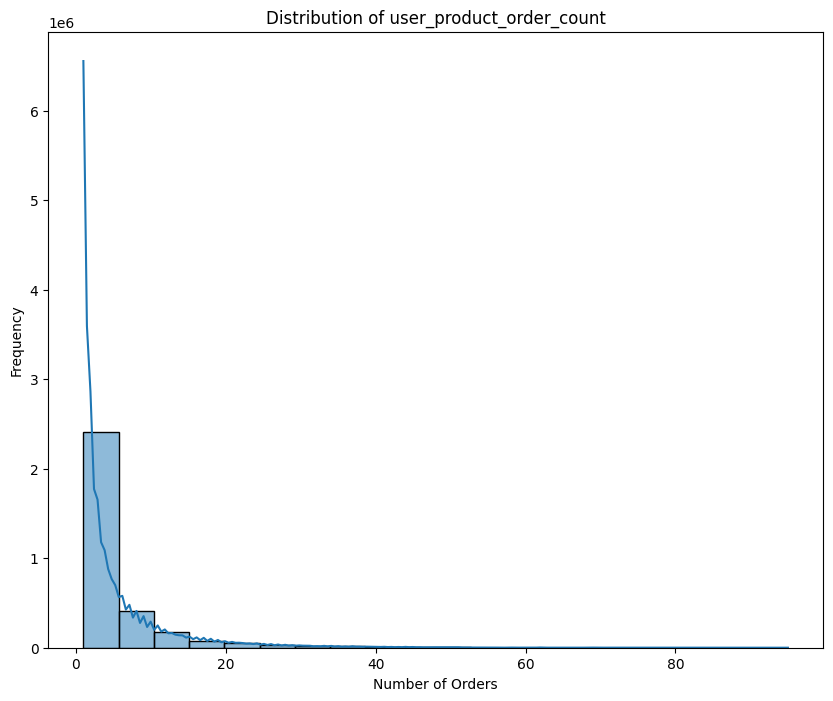

In [11]:
plt.figure(figsize = (10,8))
sns.histplot(df['user_product_order_count'], bins = 20, kde = True)
plt.title('Distribution of user_product_order_count')
plt.xlabel('Number of Orders')
plt.ylabel('Frequency')
plt.show()



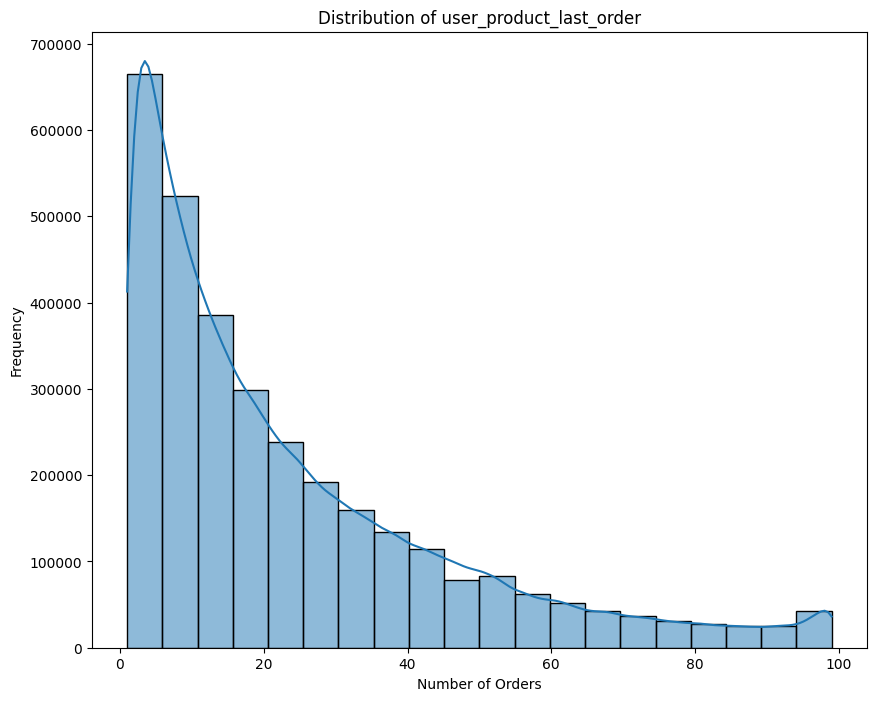

In [12]:
plt.figure(figsize = (10,8))
sns.histplot(df['user_product_last_order'], bins = 20, kde = True)
plt.title('Distribution of user_product_last_order')
plt.xlabel('Number of Orders')
plt.ylabel('Frequency')
plt.show()

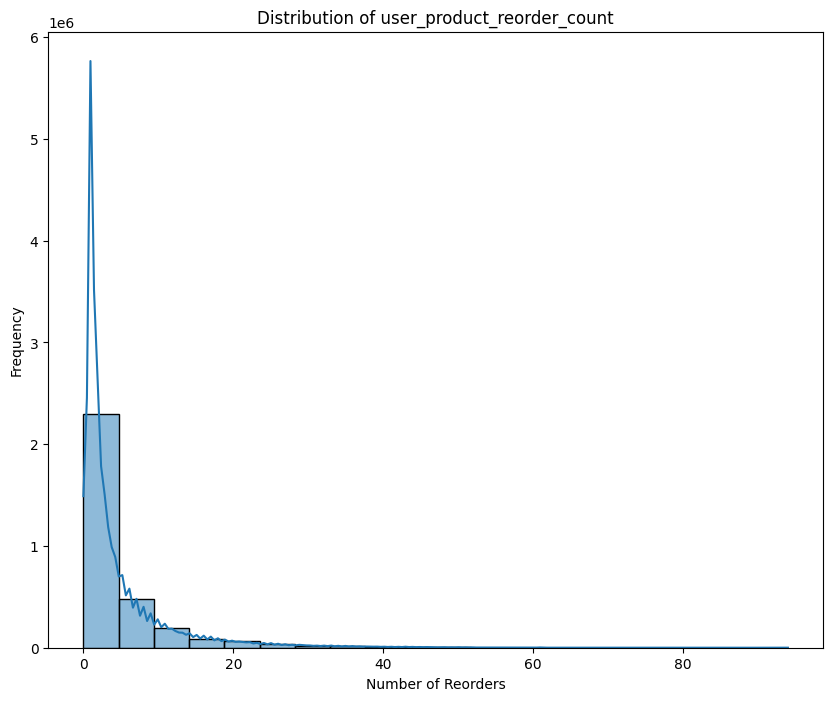

In [13]:
plt.figure(figsize = (10,8))
sns.histplot(df['user_product_reorder_count'], bins = 20, kde = True)
plt.title('Distribution of user_product_reorder_count')
plt.xlabel('Number of Reorders')
plt.ylabel('Frequency')
plt.show()

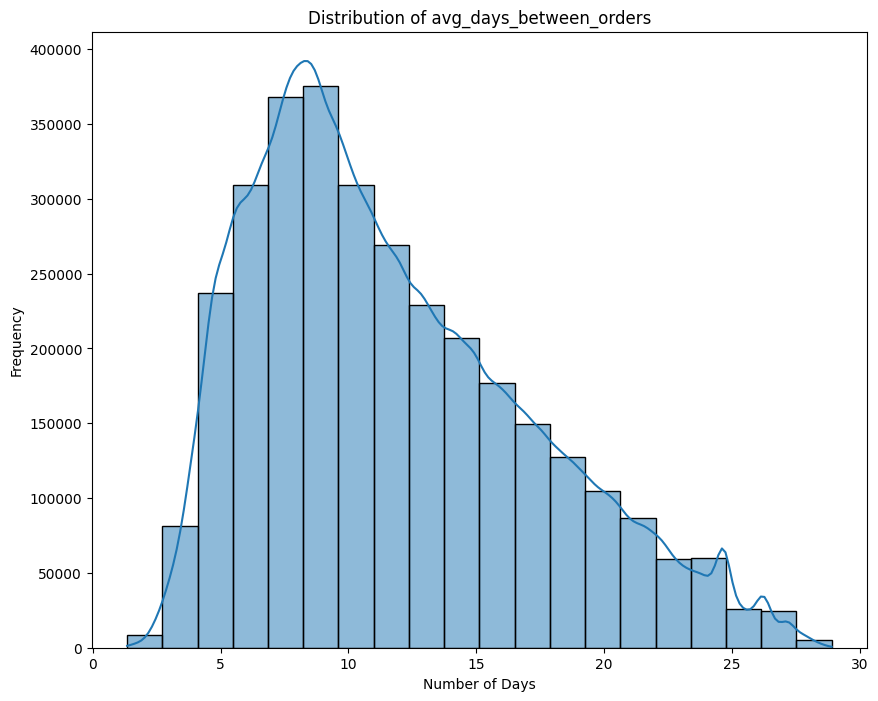

In [14]:
plt.figure(figsize = (10,8))
sns.histplot(df['avg_days_between_orders'], bins = 20, kde = True)
plt.title('Distribution of avg_days_between_orders')
plt.xlabel('Number of Days')
plt.ylabel('Frequency')
plt.show()

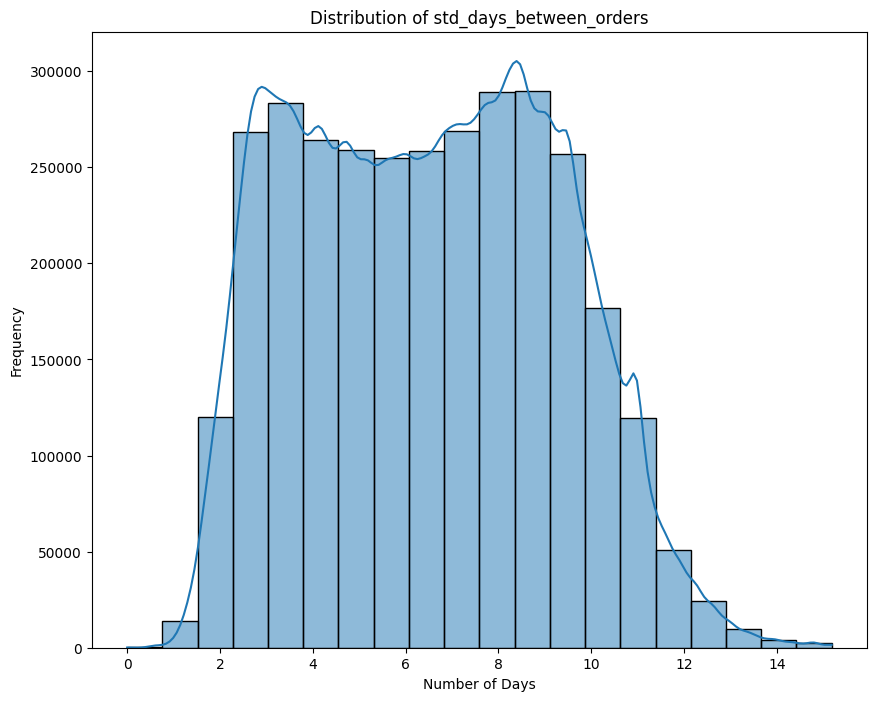

In [15]:
plt.figure(figsize = (10,8))
sns.histplot(df['std_days_between_orders'], bins = 20, kde = True)
plt.title('Distribution of std_days_between_orders')
plt.xlabel('Number of Days')
plt.ylabel('Frequency')
plt.show()

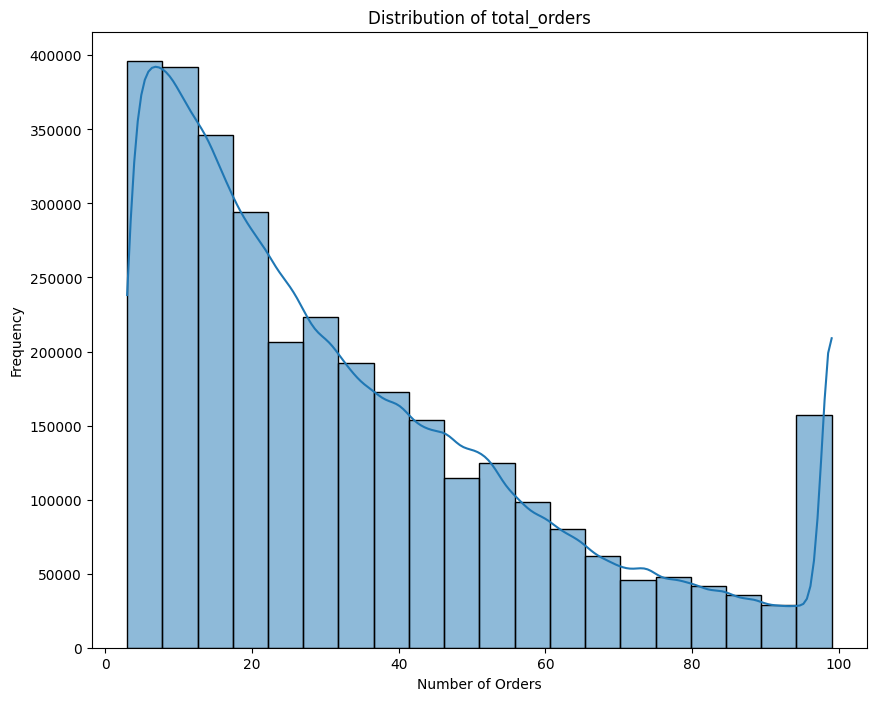

In [16]:
plt.figure(figsize = (10,8))
sns.histplot(df['total_orders'], bins = 20, kde = True)
plt.title('Distribution of total_orders')
plt.xlabel('Number of Orders')
plt.ylabel('Frequency')
plt.show()

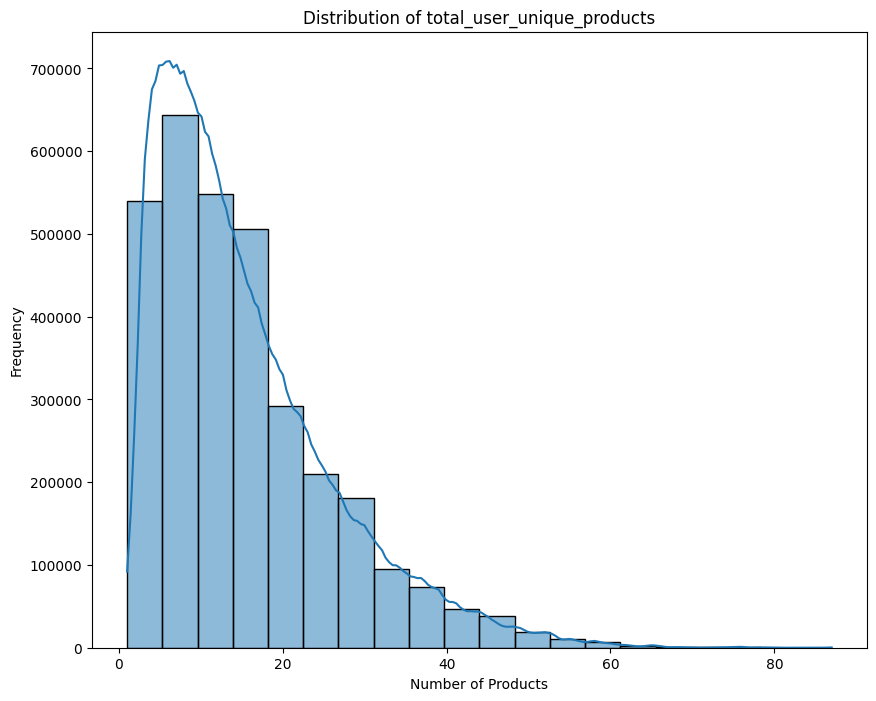

In [17]:
plt.figure(figsize = (10,8))
sns.histplot(df['total_user_unique_products'], bins = 20, kde = True)
plt.title('Distribution of total_user_unique_products')
plt.xlabel('Number of Products')
plt.ylabel('Frequency')
plt.show()

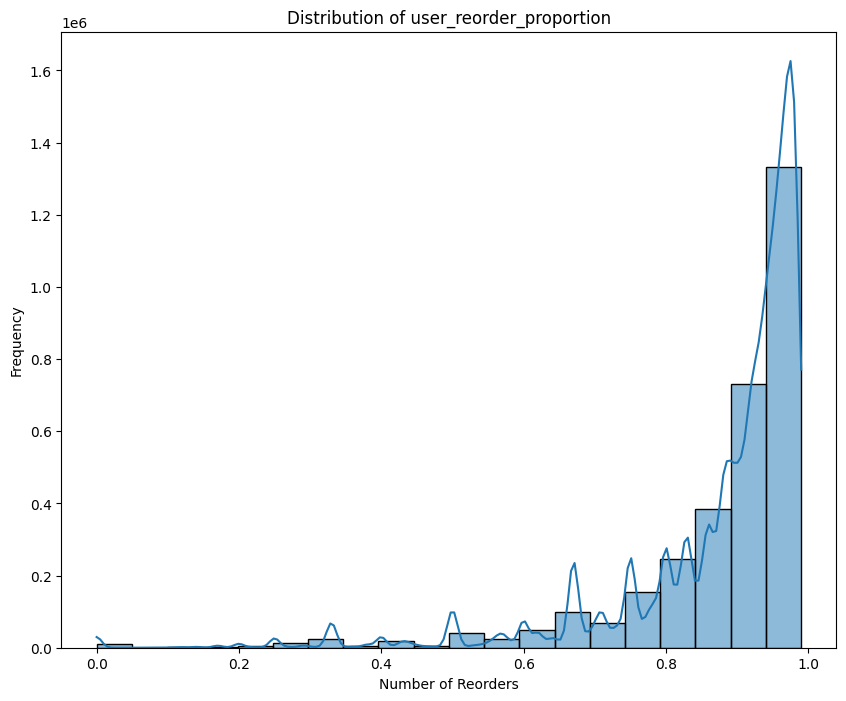

In [18]:
plt.figure(figsize = (10,8))
sns.histplot(df['user_reorder_proportion'], bins = 20, kde = True)
plt.title('Distribution of user_reorder_proportion')
plt.xlabel('Number of Reorders')
plt.ylabel('Frequency')
plt.show()

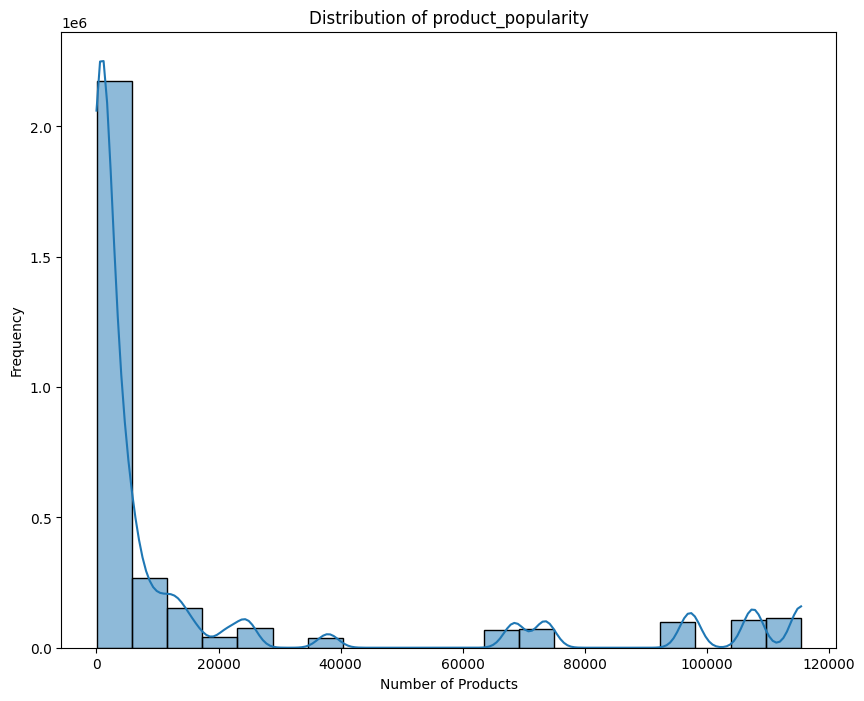

In [19]:
plt.figure(figsize = (10,8))
sns.histplot(df['product_popularity'], bins = 20, kde = True)
plt.title('Distribution of product_popularity')
plt.xlabel('Number of Products')
plt.ylabel('Frequency')
plt.show()

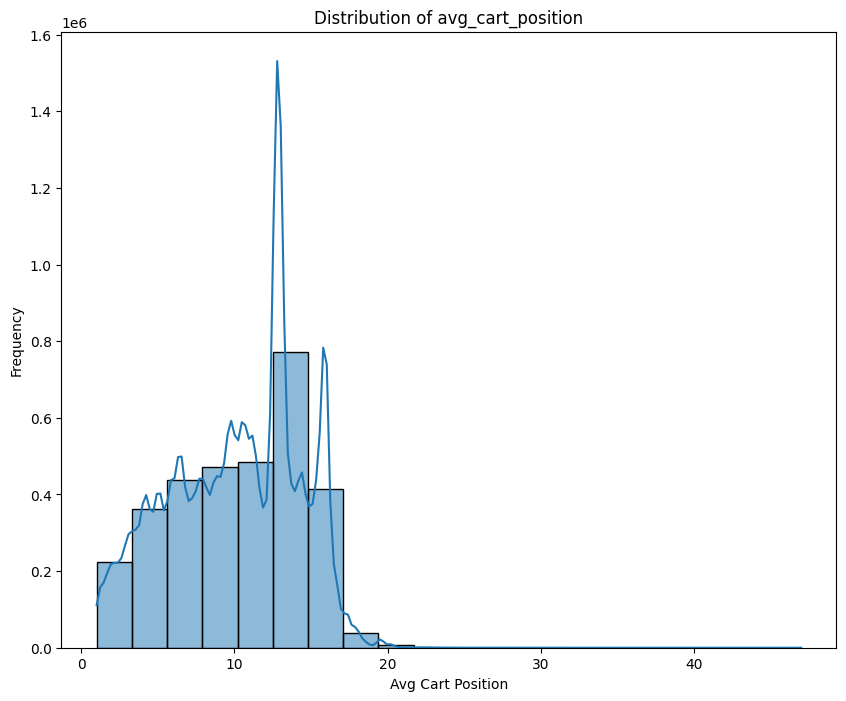

In [20]:
plt.figure(figsize = (10,8))
sns.histplot(df['avg_cart_position'], bins = 20, kde = True)
plt.title('Distribution of avg_cart_position')
plt.xlabel('Avg Cart Position')
plt.ylabel('Frequency')
plt.show()

In [21]:
main_path = r'C:/Users/ryanm/Desktop/df-mod.csv'

df_mod = df
df_mod.to_csv(main_path, index = False)